# Проект "Приоритезация гипотез и анализ результатов А/В теста"

## Содержание

##### Часть 0. Введение:
* [0.1 Цель проекта](#section_0.1)
* [0.2 Загрузка библиотек](#section_0.2)

##### Часть 1. Приоритизация гипотез:
* [1.1 Изучение данных](#section_1.1)
* [1.2 Приоритизация гипотез с использованием фреймворка ICE](#section_1.2)
* [1.3 Приоритизация гипотез с использованием фреймворка RICE](#section_1.3)
* [1.4 Выводы и рекомендации](#section_1.4)

##### Часть 2. Анализ результатов А/В-теста:
* [2.1 Изучение данных](#section_2.1)
* [2.2 Расчет и анализ кумулятивных метрик](#section_2.2)
* [2.3 Анализ выбросов и очистка данных](#section_2.3)
* [2.4 Анализ статистической значимости различий в "сырых" данных](#section_2.4)
* [2.5 Анализ статистической значимости различий в очищенных данных](#section_2.5)
* [2.6 Стабильность кумулятивных метрик в очищенных данных](#section_2.6)
* [2.7 Выводы и рекомендации по результатам анализа](#section_2.7)

## Часть 0. Введение:

<a id='section_0.1'></a>
### 0.1 Цель проекта

Совместно с отделом маркетинга приоритизировать выработанные гипотезы для увеличения выручки и запустить A/B-тест. После чего проанализировать полученные результаты и сделать рекомендации по остановке или продолжению теста.

При анализе данных планируем:
- рассчитать и изучить кумулятивные метрики,
- проанализировать выбросы и очистить данные, 
- проанализировать статистическую значимость в сырых и очищенных данных.

<a id='section_0.2'></a>
### 0.2 Загрузка библиотек

Загрузим все необходимые нам библотеки.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth

from matplotlib import pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns

## Часть 1. Приоритизация гипотез:

<a id='section_1.1'></a>
### 1.1 Изучение данных

Совместно с отделом маректинга были выработаны 9 гипотез по увеличению выручки интернет-магазина. Изучим данные гипотезы.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В полученом файле содержится следующая информация:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале: чем больше значение, тем дороже проверка гипотезы.

<a id='section_1.2'></a>
### 1.2 Приоритизация гипотез с использованием фреймворка ICE

Рассчитаем показатель ICE для каждой гипотезы и ранжируем гипотезы по убыванию данного показателя.

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round().astype('int')
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1


Исходя из полученных результатов, наибольший показатель ICE имеют гипотезы под номерами 8, 0, 7 соответственно. То есть данные гипотезы целесообразно тестировать в первую очередь.

Проверим еще гипотезы, используя фреймворк RICE, который в дополнение к параметрам влияния, уверенности в гипотезе и затрат ресурсов учитывает еще охват аудитории. 

<a id='section_1.2'></a>
### 1.3 Приоритизация гипотез с использованием фреймворка RICE

Рассчитаем показатель RICE для каждой гипотезы и отсортируем гипотезы по его убыванию.

In [4]:
hypothesis['RICE'] = ((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).
                      round().astype('int')
                     )
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


В этом случае первые три места заняли гипотезы 7, 2, 0 и 6. Гипотеза 8, которая была в первой тройке в предыдущем случае, здесь оказалась лишь на 4 месте - это связано с ее малым охватом, так как она рассчитана только на именинников.

Гипотезы 0 и 7 попали в топ в обоих случаях. Однако, охват аудитории в гипотезе 0 существенно ниже при том, что затраты на реализацию - выше, чем у гипотезы 7.

<a id='section_1.4'></a>
### 1.4 Выводы и рекомендации

Мы проанализизовали гипотезы с использованием фреймворков ICE и RICE. Фреймворк ICE учитывает оценку влияния гипотезы, уверенности в результате и затрат ресурсов. Фреймворк RICE - в дополнение к вышеуказанным параметрам - также учитывает охват аудитории.

По результатам расчета ICE максимальные баллы набрали гипотезы под номерами **8** (*'Запустить акцию, дающую скидку на товар в день рождения'*), **0** (*'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'*), **7** (*'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'*) соответственно. 

После приоритизации гипотез с использованием фреймворка RICE первые три места заняли гипотезы **7** (*'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'*), **2** (*'Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа'*), **0** (*'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'*) и **6** (*'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'*). Гипотеза **8**, которая была в первой тройке при оценке по фреймворку ICE, оказалась лишь на 4 месте при оценке по фрейворку RICE - это связано с ее малым охватом, так как она рассчитана только на именинников.

Гипотезы **0** и **7** попали в топ в обоих случаях. Однако, охват аудитории в гипотезе **0** существенно ниже при том, что затраты на реализацию - выше, чем у гипотезы **7**. 

Учитывая вышеописанное, представляется целесообразным начать с тестирования гипотезы **7**. 

## Часть 2. Анализ результатов A/B-теста:

<a id='section_2.1'></a>
### 2.1 Изучение данных

Мы провели A/B-тест. Проанализируем его результаты, чтобы принять решение о прекращении или продлении теста.

Для начала ознакомимся с полученными данными и, при необходимости, обработаем их для дальнейшего анализа.

In [5]:
# Загружаем датасет и смотрим первые строки
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
# Смотрим информацию о количестве данных и типах данных
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
# Проверяем на наличие дубликатов
visitors.duplicated().sum()

0

In [8]:
# Меняем тип данных в столбце с датами
visitors['date'] = pd.to_datetime(visitors['date'])

In [9]:
# Смотрим, за какой период собраны данные
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [10]:
# Смотрим, количество пользователей в каждой группе
visitors.groupby('group').agg({'visitors': 'sum'})

,visitors
group,
A,18736
B,18916


В датасете **Visitors** представлены следующие данные:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

По результатам ознакомления с датасетом  мы сделали следующие наблюдения:

1. Данные чистые - не содержат пропусков и дубликатов.
2. Всего содержатся данные за период с 1 по 31 августа 2019 года.
3. Количество пользователей, попавших в разные группы, отличается менее чем на 0,01%, что допустимо и не должно повлиять на результаты теста.

In [11]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
# Меняем азвания столбцов
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [13]:
# Смотрим инфомрацию о количестве и типах данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null object
revenue           1197 non-null int64
group             1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
# Проверям на дубликаты
orders.duplicated().sum()

0

In [15]:
# Меняем тип данных в столбце с датами
orders['date'] = pd.to_datetime(orders['date'])

In [16]:
# Смотрим период проведения теста
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [17]:
# Смотрим суммарные данные по группам о количестве покупателей, заказов, выручке
orders.groupby('group').agg({'visitor_id': 'nunique', 'transaction_id': 'count', 'revenue': 'sum'})

,visitor_id,transaction_id,revenue
group,,,
A,503,557,4084803
B,586,640,5907760


В датасете **Orders** представлены следующие данные:

* `transaction_id` — идентификатор заказа;
* `visitor_id` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

По результатам ознакомления с датасетом  мы сделали следующие наблюдения:

1. Данные чистые - не содержат пропусков и дубликатов.
2. Всего содержатся данные за период с 1 по 31 августа 2019 года.

<a id='section_2.2'></a>
### 2.2 Расчет и анализ кумулятивных метрик

Проанализируем такие кумулятивные конверсию и средний чек по группам. Построим графики для каждой группы, а также график относительного изменения кумулятивных метрик одной группы к другой.

#### Кумулятивная выручка
Сначала проанализируем кумулятивную выручку по группам.

In [18]:
# Функция для построения графиков по группам 
def comparative_lineplot(f1, f2, series11, series12, data1, series21, series22, data2, title, l1, l2):
    plt.figure(figsize=(f1, f2))
    plt.plot(series11, series12, data=data1)
    plt.plot(series21, series22, data=data2)
    plt.grid(b=True)
    plt.xticks(rotation=45)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend((l1, l2))
    plt.show()

In [19]:
# Функция для построения графика относительного изменения 
def lineplot (f1, f2, series1, series2, data, title, y):
    plt.figure(figsize=(f1, f2))
    plt.plot(series1, series2, data=data)
    plt.grid(b=True)
    plt.xticks(rotation=45)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.axhline(y=y, color='black', linestyle='--') 
    plt.show()

In [20]:
# Делаем сводную таблицу для группы А с суммарным количеством заказов и выручкой на каждый день тестирования
orders_a_daily = (orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']].
                  groupby('date', as_index=False).
                  agg({'transaction_id': 'nunique', 'revenue': 'sum'})
                 )
# Переименуем столбцы
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# Делаем сводную таблицу с кумулятивной выручкой и количеством заказов
orders_a_cumulative = (orders_a_daily.
                       apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].
                             agg({'date': 'max', 'orders_per_date_a': 'sum', 
                                  'revenue_per_date_a': 'sum'}), axis=1).sort_values(by='date')
                       )
# Переименуем столбцы
orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']
# Смотрим, что получилось
orders_a_cumulative.head()

,date,orders_cumulative_a,revenue_cumulative_a
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [21]:
# Делаем сводную таблицу для группы В с суммарным количеством заказов и выручкой на каждый день тестирования
orders_b_daily = (orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']].
                  groupby('date', as_index=False).
                  agg({'transaction_id': 'nunique', 'revenue' : 'sum'})
                 )
# Переименуем столбцы
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# Делаем сводную таблицу с кумулятивной выручкой и количеством заказов
orders_b_cumulative = (orders_b_daily.
                       apply(lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].
                             agg({'date': 'max', 'orders_per_date_b': 'sum', 
                                  'revenue_per_date_b': 'sum'}), axis=1).sort_values(by='date')
                       )
# Переименуем столбцы
orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']
# Смотрим, что получилось
orders_b_cumulative.head()

,date,orders_cumulative_b,revenue_cumulative_b
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


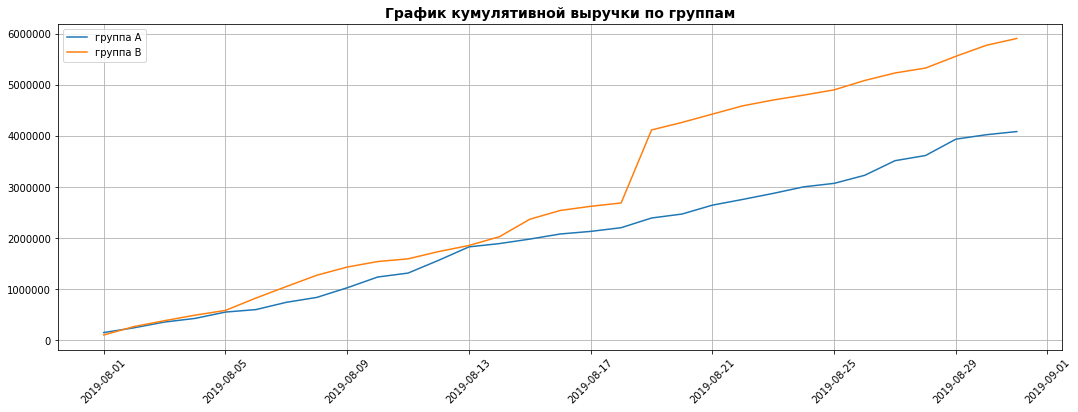

In [22]:
# Вызываем функцию для построения графиков кумулятивной выручки по группам
comparative_lineplot(18, 6,
                    'date', 'revenue_cumulative_a', orders_a_cumulative,
                    'date', 'revenue_cumulative_b', orders_b_cumulative,
                    'График кумулятивной выручки по группам',
                    'группа А', 'группа B') 

Видим на графике, что примерно до 19 августа выручка нарастала линейно, и показатели двух групп отличались несущественно. После этого, 19 августа, в выручке группы В произошел резкий скачок - похоже, был сделан крупный заказ. Далее продолжилось постепенное равномерное увеличение в обоих группах. 

#### Кумулятивный средний чек

Далее проанализируем кумулятивный средний чек по группам.

In [23]:
# Считаем кумулятивный средний чек для группы А
orders_a_cumulative['arrpu_cumulative_a'] = (orders_a_cumulative['revenue_cumulative_a'] / 
                                             orders_a_cumulative['orders_cumulative_a'] 
                                            )

# Считаем кумулятивный средний чек для группы В
orders_b_cumulative['arrpu_cumulative_b'] = (orders_b_cumulative['revenue_cumulative_b'] / 
                                             orders_b_cumulative['orders_cumulative_b'] 
                                            )

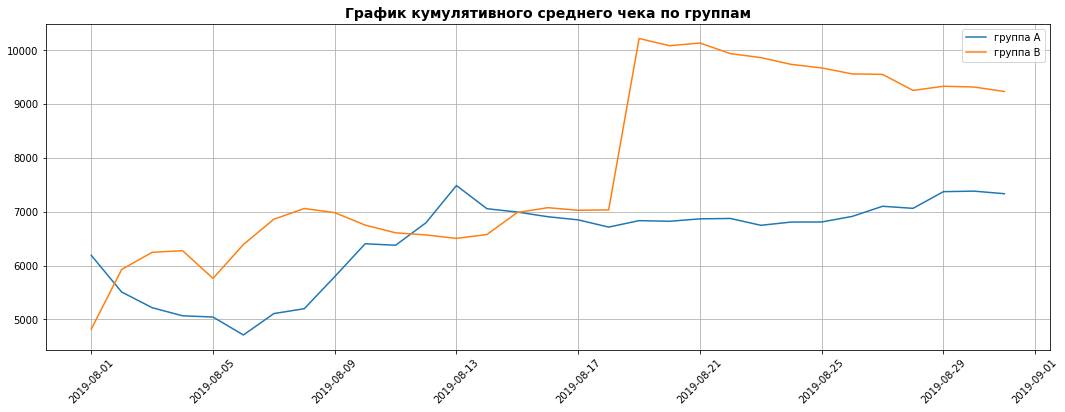

In [24]:
# Строим графики средних чеков для обеих групп
comparative_lineplot(18, 6,
                    'date', 'arrpu_cumulative_a', orders_a_cumulative,
                    'date', 'arrpu_cumulative_b', orders_b_cumulative,
                    'График кумулятивного среднего чека по группам',
                    'группа А', 'группа B') 

Видим, что данные по кумулятивному чеку для группы А стабилизировались, начиная с 14 августа. Однако, в группе В 19 августа произошел резкий скачок. Это подтверждает ранее сделанную нами догадку о высокостоимостном заказе, который попал в группу В.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [25]:
# Объединяем датасеты с данными по кумулятивному среднему чеку для 2 групп
orders_merged_cumulative = orders_a_cumulative.merge(orders_b_cumulative, on='date')
orders_merged_cumulative['arrpu_cumulative_b_to_a'] = (orders_merged_cumulative['arrpu_cumulative_b'] / 
                                                       orders_merged_cumulative['arrpu_cumulative_a'] - 1
                                                      )

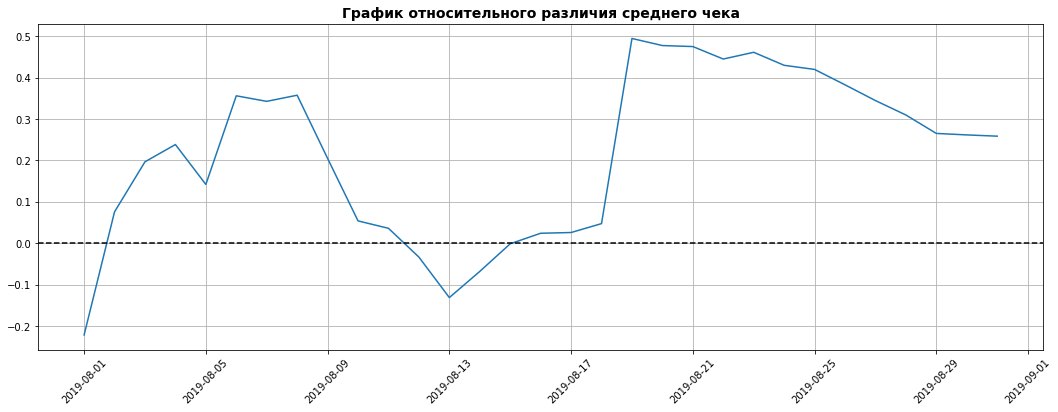

In [26]:
# Строим график, используя функцию

lineplot(18, 6,
        'date', 'arrpu_cumulative_b_to_a', orders_merged_cumulative,
        'График относительного различия среднего чека', 
         0)

Данные по относительному изменению среднего чека трудно интерпретировать в пользу одной из групп, так как в первой половине периода теста данные нестабильны, а преимущество группы В во второй половине периода, возможно, связано с высокостоимостным заказом, который является нетипичным и может быть отнесен к выбросам.

В дальнейшем анализе очистим данные от выбросов и проверим, отразится ли это на результатах.

#### Кумулятивная конверсия

Изучим данные по кумулятивной конверсии в группах и визуализируем их на графике.

In [27]:
# Выберем данные по группе А
visitors_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# Рассчитаем кумулятивные посещеия на каждоу даты для группы А
visitors_a_cumulative = (visitors_a_daily.
                         apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].
                                agg({'date': 'max', 'visitors_per_date_a': 'sum'}), axis=1)
                         )
visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']

In [28]:
# Выберем данные по группе В
visitors_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# Рассчитаем кумулятивные посещеия на каждоу даты для группы В
visitors_b_cumulative = (visitors_b_daily.
                         apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].
                               agg({'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1)
                        )
visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']

In [29]:
# Объединяем даные по визитам и заказам
full_data = (orders_a_daily.
             merge(orders_b_daily, left_on='date', right_on='date', how='left').
             merge(orders_a_cumulative, left_on='date', right_on='date', how='left').
             merge(orders_b_cumulative, left_on='date', right_on='date', how='left').
             merge(visitors_a_daily, left_on='date', right_on='date', how='left').
             merge(visitors_b_daily, left_on='date', right_on='date', how='left').
             merge(visitors_a_cumulative, left_on='date', right_on='date', how='left').
             merge(visitors_b_cumulative, left_on='date', right_on='date', how='left')
            )

full_data.head(5) 

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cumulative_a,arrpu_cumulative_a,orders_cumulative_b,revenue_cumulative_b,arrpu_cumulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cumulative_a,visitors_cumulative_b
0,2019-08-01,24,148579,21,101217,24,148579,6190.791667,21,101217,4819.857143,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,5509.113636,45,266748,5927.733333,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,5218.735294,61,380996,6245.836066,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,5067.845238,78,489567,6276.500000,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,5045.110092,101,581995,5762.326733,756,707,3318,3280


In [30]:
# Выберем необходимые данные для расчета кумулятивной конверсии группы А
conversion_data_a = full_data[['date', 'orders_cumulative_a', 'visitors_cumulative_a']].copy()

# Рассчитаем кумулятивную конверсию группы А
conversion_data_a['conversion_cumulative_a'] = (conversion_data_a['orders_cumulative_a'] / 
                                                conversion_data_a['visitors_cumulative_a']
                                               )
# Посмотрим, что получилось
conversion_data_a.head()

,date,orders_cumulative_a,visitors_cumulative_a,conversion_cumulative_a
0,2019-08-01,24,719,0.033380
1,2019-08-02,44,1338,0.032885
2,2019-08-03,68,1845,0.036856
3,2019-08-04,84,2562,0.032787
4,2019-08-05,109,3318,0.032851


In [31]:
# Выберем необходимые данные для расчета кумулятивной конверсии группы В
conversion_data_b = full_data[['date', 'orders_cumulative_b', 'visitors_cumulative_b']].copy()

# Рассчитаем кумулятивную конверсию группы А
conversion_data_b['conversion_cumulative_b'] = (conversion_data_b['orders_cumulative_b'] / 
                                                conversion_data_b['visitors_cumulative_b']
                                               )

# Посмотрим, что получилось
conversion_data_b.head()

,date,orders_cumulative_b,visitors_cumulative_b,conversion_cumulative_b
0,2019-08-01,21,713,0.029453
1,2019-08-02,45,1294,0.034776
2,2019-08-03,61,1803,0.033833
3,2019-08-04,78,2573,0.030315
4,2019-08-05,101,3280,0.030793


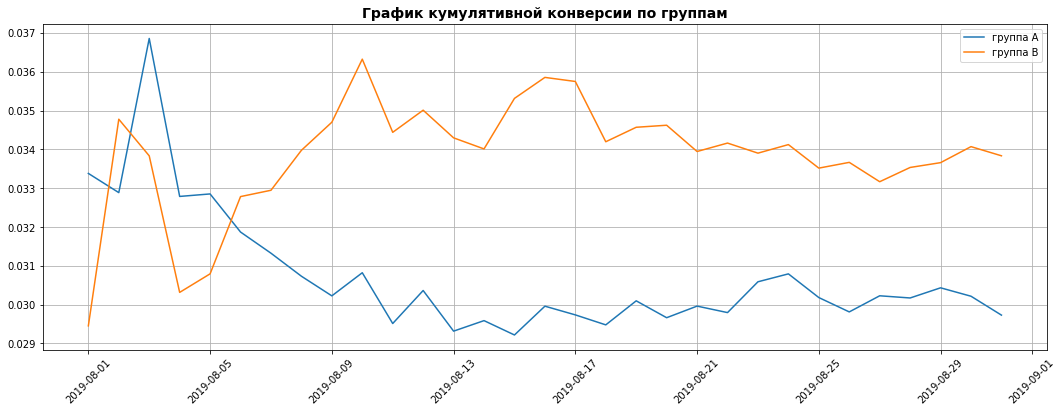

In [32]:
# Строим график по группам
comparative_lineplot(18, 6,
                    'date', 'conversion_cumulative_a', conversion_data_a,
                    'date', 'conversion_cumulative_b', conversion_data_b,
                    'График кумулятивной конверсии по группам',
                    'группа А', 'группа B') 

Графики выглядят довольно стабилизировавшимися примерно со второй декады августа, и конверсия группы В стабильно выше конверсии группы  А.

Визуализируем относительное изменения кумулятивной конверсии группы B к группе A на графике.

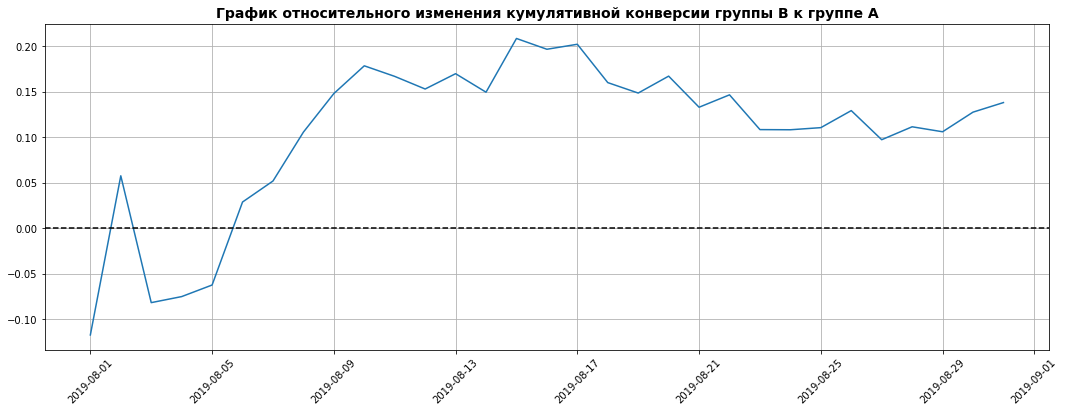

In [33]:
# Соединяем нужные данные в одном датафрейме
merged_cumulative_conversions = (conversion_data_a[['date','conversion_cumulative_a']].
                                 merge(conversion_data_b[['date','conversion_cumulative_b']], 
                                       left_on='date', right_on='date', how='left')
                                )


# Считаем относительное изменение
merged_cumulative_conversions['conversion_cumulative_b_to_a'] = ((merged_cumulative_conversions['conversion_cumulative_b'] /
                                                                 merged_cumulative_conversions['conversion_cumulative_a']) - 1
                                                                )

# Строим график, используя функцию 
lineplot (18, 6, 
          'date', 'conversion_cumulative_b_to_a', merged_cumulative_conversions,
          'График относительного изменения кумулятивной конверсии группы B к группе A',
          0)

По данному графику так же видно, что после первой декады данные стабилизировались, и конверсия группы В стабильно превышает конверсию группы А.

<a id='section_2.3'></a>
### 2.3 Анализ выбросов и очистка данных

#### Количество заказов на пользователя

Проанализируем данные по количеству заказов на одного пользователя и по стоимости заказов и отфильтруем аномальные данные.

In [34]:
# Делаем сводную таблицу с количеством заказов на одного пользователя
orders_quantity_per_visitor = orders.groupby(['group', 'visitor_id']).agg({'transaction_id': 'nunique'}).reset_index()
orders_quantity_per_visitor.columns = ['group', 'visitor_id', 'no_of_orders']

# Смотрим, что получилось
orders_quantity_per_visitor.head()

,group,visitor_id,no_of_orders
0,A,8300375,1
1,A,11685486,1
2,A,54447517,1
3,A,66685450,1
4,A,78758296,1


In [35]:
# Функция, которая строит точечный график
def scatterplot (f1, f2, x, y, hue, data, alpha, title, ylabel, xlabel):
    plt.figure(figsize=(f1, f2))
    sns.scatterplot(x=x, y=y, hue=hue, data=data, alpha=alpha, legend='brief')
    plt.title(title, fontweight='bold', fontsize=14)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

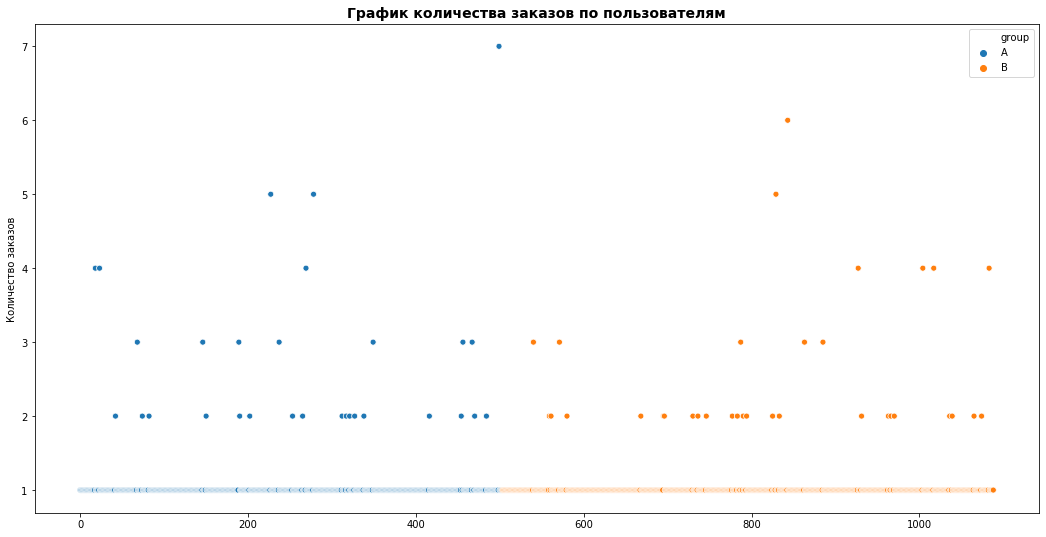

In [36]:
# Построим график, использую функцию
scatterplot(18, 9,
            orders_quantity_per_visitor.index, 'no_of_orders', 'group', orders_quantity_per_visitor, 
            1, 'График количества заказов по пользователям', 'Количество заказов', '')

График показывает, что основная масса покупателей делает 1-2 заказа за период в 1 месяц, что выглядит логичным. Однако, есть покупатели, которые делают 3, 4 и даже 7 заказов. 

Посчитаем, чему равны 95-й и 99-й перцентили количества заказов на пользователя, чтобы определиться с границей для поиска пользователей с аномальным количеством заказов.

In [37]:
# Считем перцентили с помощью встроенной функции библиотеки numpy
np.percentile(orders_quantity_per_visitor['no_of_orders'], [95, 99])

array([2., 4.])

Видим, что 95-й перцентиль равен 2, а 99-й - 4 заказам на пользователя. Выберем 99-й перцентиль в качестве границы для отсечения аномальных пользователей в дальнейшем анализе.

#### Стоимость заказа

Проверим данные о стоимости заказов и отфильтруем заказы с нетипично высокой стоимостью.

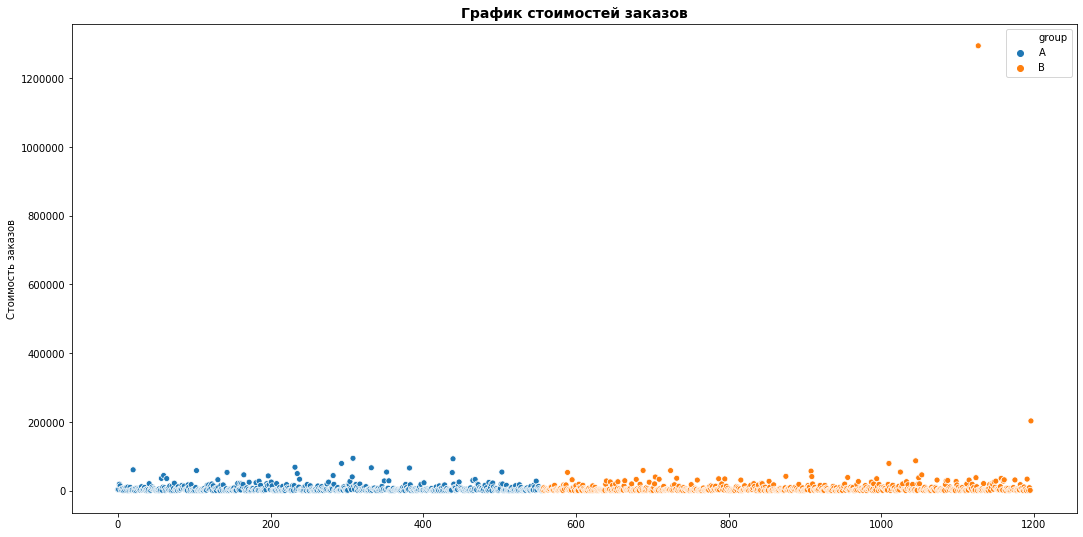

In [38]:
# Сортируем данные по группам для более наглядной визуализации
orders_sort_by_group = orders.sort_values(by='group').reset_index()

# Построим график, использую функцию
scatterplot(18, 9,
            orders_sort_by_group.index, 'revenue', 'group', orders_sort_by_group, 
            1, 'График стоимостей заказов', 'Cтоимость заказов', '')

Видим, 2 заказа в группе В очень сильно выбивающиеся из общей массы данных. Посчитаем 95-й и 99-й перцентили стоимости заказов, чтобы определить границу для аномальных заказов.

In [39]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

95-й перцентиль равен 28000 рублей, а 99-й - 58233.2 рублей.

Обновим график, установив стоимость заказа в 58234 рубля в качестве верхней границы, чтобы с его помощью выбрать границу для отсечения аномальных заказов.

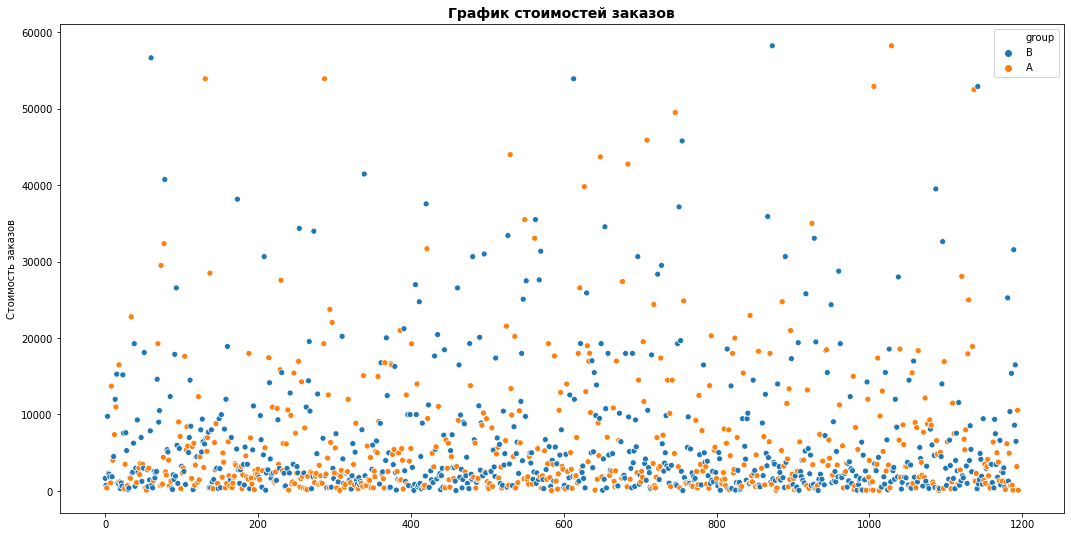

In [40]:
# Построим график, использую функцию
scatterplot(18, 9,
            orders.query('revenue < 58234').index, 'revenue', 'group', orders.query('revenue < 58234'), 
            1, 'График стоимостей заказов', 'Cтоимость заказов', '')

Заказов со стоимостью до 40000 рублей довольно много, а после 40000 рублей количество заказов резко снижается. Выберем 40000 рублей в качестве верхней границы стоимости заказов. 

Теперь соберем данных об id пользователей с нетипичным поведением в один датафрейм, чтобы можно было использовать в дальнейшем для очистки данных.

In [41]:
# Соберем данные по количеству заказов каждого пользователя группы А
orders_by_visitors_a = (orders[orders['group'] == 'A'].
                       groupby('visitor_id', as_index=False).
                       agg({'transaction_id' : 'nunique'})
                       )
orders_by_visitors_a.columns = ['visitor_id', 'orders']

# Соберем данные по количеству заказов каждого пользователя группы В
orders_by_visitors_b = (orders[orders['group'] == 'B'].
                       groupby('visitor_id', as_index=False).
                       agg({'transaction_id' : 'nunique'})
                       )
orders_by_visitors_b.columns = ['visitor_id', 'orders'] 

In [42]:
# Сделаем выборку visitor_id тех покупателей, которые совершили более 4 заказов
visitors_with_numerous_orders = pd.concat([orders_by_visitors_a[orders_by_visitors_a['orders'] > 4]['visitor_id'], 
                                           orders_by_visitors_b[orders_by_visitors_b['orders'] > 4]['visitor_id']], 
                                          axis = 0)

# Сделаем выборку visitor_id тех покупателей, которые совершили более 4 заказов
visitors_with_expensive_orders = orders[orders['revenue'] > 40000]['visitor_id']

# Делаем выборку id анормальных юзеров
abnormal_users = (pd.concat([visitors_with_numerous_orders, visitors_with_expensive_orders], axis = 0).
                  drop_duplicates().sort_values()
                 )

# Посмотрим, сколько их всего
abnormal_users.shape 

(29,)

<a id='section_2.4'></a>
### 2.4 Анализ статистической значимости различий в "сырых" данных

#### Конверсия

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным, используя тест Манна-Уитни.

In [43]:
# Дополним датафрейм информацией о количестве пользователей, не совершивших заказы, для группы А 
conversion_sample_a = (pd.concat([orders_by_visitors_a['orders'], 
                                  pd.Series(0, index = np.arange(full_data['visitors_per_date_a'].sum() - 
                                                                 len(orders_by_visitors_a['orders'])), 
                                            name='orders')],axis=0)
                      )

# Дополним датафрейм информацией о количестве пользователей, не совершивших заказы, для группы B 
conversion_sample_b = (pd.concat([orders_by_visitors_b['orders'], 
                                  pd.Series(0, index = np.arange(full_data['visitors_per_date_b'].sum() - 
                                                                 len(orders_by_visitors_b['orders'])), 
                                            name='orders')],axis=0)
                      )

In [44]:
# Рассчитаем p-value
print("P-value = {0:.3f}.".format(stats.mannwhitneyu(conversion_sample_a, conversion_sample_b)[1]))

# Рассчиатем относительное изменение конверсии
print("Относительное изменение конверсии группы В относительно группы А равно {0:.3f}.".
      format(conversion_sample_b.mean() / conversion_sample_a.mean() - 1)) 

P-value = 0.008.
Относительное изменение конверсии группы В относительно группы А равно 0.138.


**Вывод:** p-value существенно ниже 0.05, значит, мы отвергаем нулевую гипотезу о том, что в данных нет статистически значимых различий. Увеличение конверсии группы В относительно группы А составило 13.8%.

#### Средний чек

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [45]:
# Рассчитаем p-value
print("P-value = {0:.3f}.".
      format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# Рассчиатем относительное изменение среднего чека
print("Относительное изменение различий в среднем чеке заказа группы В относительно группы А равно {0:.3f}.".
      format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1)) 

P-value = 0.365.
Относительное изменение различий в среднем чеке заказа группы В относительно группы А равно 0.259.


**Вывод:** p-value существенно выше 0.05, значит, мы не можем отвергнуть нулевую гипотезу о том, что в данных о среднем чеке нет статистически значимых различий, несмотря на то, что увеличение среднего чека группы В относительно группы А составило 25.9%.

<a id='section_2.5'></a>
### 2.5 Анализ статистической значимости различий в очищенных данных

#### Конверсия

Проверим, есть ли различия в конверсии между группами после очистки данных.


In [46]:
# Создаем датафрейм с очищенными данными для расчета конверсии группы А
conversion_sample_a_filtered = (pd.concat([orders_by_visitors_a[np.logical_not(orders_by_visitors_a['visitor_id'].
                                                                    isin(abnormal_users))]['orders'], 
                                pd.Series(0, index = np.arange(full_data['visitors_per_date_a'].sum() - 
                                                               len(orders_by_visitors_a['orders'])), 
                                          name='orders')],axis=0)
                               )

# Создаем датафрейм с очищенными данными для расчета конверсии группы В
conversion_sample_b_filtered = (pd.concat([orders_by_visitors_b[np.logical_not(orders_by_visitors_b['visitor_id'].
                                                                    isin(abnormal_users))]['orders'], 
                                pd.Series(0, index = np.arange(full_data['visitors_per_date_b'].sum() - 
                                                               len(orders_by_visitors_b['orders'])), 
                                          name='orders')],axis=0)
                               )

In [47]:
# Рассчитаем p-value
print("P-value = {0:.3f}.".format(stats.mannwhitneyu(conversion_sample_a_filtered, conversion_sample_b_filtered)[1]))

# Рассчитаем относительное изменение конверсии
print("Относительное изменение конверсии группы В относительно группы А равно {0:.3f}.".
      format(conversion_sample_b_filtered.mean() / conversion_sample_a_filtered.mean() - 1)) 

P-value = 0.005.
Относительное изменение конверсии группы В относительно группы А равно 0.166.


**Вывод:** p-value существенно ниже 0.05, значит, как и при оценке по "сырым" данным, мы отвергаем нулевую гипотезу о том, что в данных нет статистически значимых различий. Увеличение конверсии группы В относительно группы А по очищенным данным составило 16.6%, что выше чем при оценке по сырым данным.

#### Средний чек

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным.

In [48]:
# Рассчитаем p-value
print("P-value = {0:.3f}.".
      format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
                                                      np.logical_not(orders['visitor_id'].
                                                                     isin(abnormal_users)))]['revenue'],
                                orders[np.logical_and(orders['group'] == 'B', 
                                                      np.logical_not(orders['visitor_id'].
                                                                     isin(abnormal_users)))]['revenue'])[1]))

# Рассчитаем относительное изменение среднего чека
print("Относительное изменение различий в среднем чеке заказа группы В относительно группы А равно {0:.3f}.".
      format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].
                                                                        isin(abnormal_users)))]['revenue'].mean() / 
             orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].
                                                                          isin(abnormal_users)))]['revenue'].mean() - 1)) 

P-value = 0.306.
Относительное изменение различий в среднем чеке заказа группы В относительно группы А равно 0.069.


**Вывод:** p-value существенно выше 0.05, значит, мы не можем отвергнуть нулевую гипотезу о том, что в данных о среднем чеке нет статистически значимых различий. После очистки данных увеличение среднего чека группы В относительно группы А значительно скоректировалось и составило 6.9%.

<a id='section_2.6'></a>
### 2.6 Стабильность кумулятивных метрик после очистки данных

Чтобы принять решение о возможности прекращения тестирования, проверим, насколько стабилизировавшимися можно считать наши данные после очистки от выбросов.

Рассчитаем и визуализируем кумулятивную выручку, исключив анормальные заказы.

In [49]:
# Делаем сводную таблицу для группы А с суммарным количеством заказов и выручкой на каждый день тестирования
orders_a_daily_filtered = (orders.query('group == "A" & ~visitor_id.isin(@abnormal_users)').
                           groupby('date', as_index=False).
                           agg({'transaction_id': 'nunique', 'revenue': 'sum'})
                 )
# Переименуем столбцы
orders_a_daily_filtered.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# Делаем сводную таблицу с кумулятивной выручкой и количеством заказов
orders_a_cumulative_filtered = (orders_a_daily_filtered.
                               apply(lambda x: orders_a_daily_filtered[orders_a_daily_filtered['date'] <= x['date']].
                               agg({'date': 'max', 'orders_per_date_a': 'sum', 
                                    'revenue_per_date_a': 'sum'}), axis=1).sort_values(by='date')
                       )
# Переименуем столбцы
orders_a_cumulative_filtered.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']
# Смотрим, что получилось
orders_a_cumulative_filtered.head()

,date,orders_cumulative_a,revenue_cumulative_a
0,2019-08-01,23,142779
1,2019-08-02,43,236601
2,2019-08-03,67,349074
3,2019-08-04,80,415489
4,2019-08-05,105,539707


In [50]:
# Делаем сводную таблицу для группы В с суммарным количеством заказов и выручкой на каждый день тестирования
orders_b_daily_filtered = (orders.query('group == "B" & ~visitor_id.isin(@abnormal_users)').
                           groupby('date', as_index=False).
                           agg({'transaction_id': 'nunique', 'revenue': 'sum'})
                 )
# Переименуем столбцы
orders_b_daily_filtered.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# Делаем сводную таблицу с кумулятивной выручкой и количеством заказов
orders_b_cumulative_filtered = (orders_b_daily_filtered.
                               apply(lambda x: orders_b_daily_filtered[orders_b_daily_filtered['date'] <= x['date']].
                               agg({'date': 'max', 'orders_per_date_b': 'sum', 
                                    'revenue_per_date_b': 'sum'}), axis=1).sort_values(by='date')
                       )
# Переименуем столбцы
orders_b_cumulative_filtered.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']
# Смотрим, что получилось
orders_b_cumulative_filtered.head()

,date,orders_cumulative_b,revenue_cumulative_b
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,77,486767
4,2019-08-05,99,576775


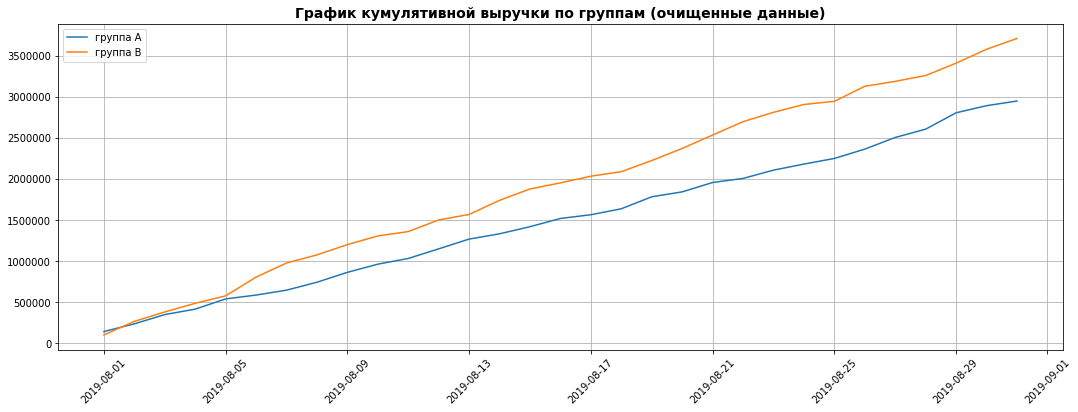

In [51]:
# Вызываем функцию для построения графиков кумулятивной выручки по группам
comparative_lineplot(18, 6,
                    'date', 'revenue_cumulative_a', orders_a_cumulative_filtered,
                    'date', 'revenue_cumulative_b', orders_b_cumulative_filtered,
                    'График кумулятивной выручки по группам (очищенные данные)',
                    'группа А', 'группа B') 

Визуализация очищенных данных демонстрирует графики без пиков и падений со стабильным преимуществом группы В.

In [52]:
# Считаем кумулятивный средний чек для группы А
orders_a_cumulative_filtered['arrpu_cumulative_a'] = (orders_a_cumulative_filtered['revenue_cumulative_a'] / 
                                                     orders_a_cumulative_filtered['orders_cumulative_a'] 
                                                     )

# Считаем кумулятивный средний чек для группы В
orders_b_cumulative_filtered['arrpu_cumulative_b'] = (orders_b_cumulative_filtered['revenue_cumulative_b'] / 
                                                     orders_b_cumulative_filtered['orders_cumulative_b'] 
                                                     )

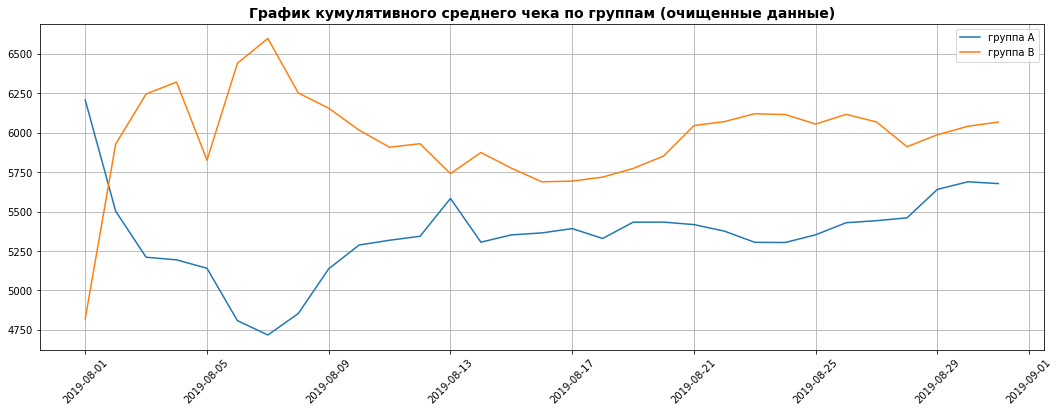

In [53]:
# Строим графики средних чеков для обеих групп
comparative_lineplot(18, 6,
                    'date', 'arrpu_cumulative_a', orders_a_cumulative_filtered,
                    'date', 'arrpu_cumulative_b', orders_b_cumulative_filtered,
                    'График кумулятивного среднего чека по группам (очищенные данные)',
                    'группа А', 'группа B') 

После стабилизации данных средний чек группы В стабильно выше даже после исключения дорогостоящих заказов.

In [54]:
# Объединяем датасеты с данными по кумулятивному среднему чеку для 2 групп
orders_merged_cumulative_filtered = orders_a_cumulative_filtered.merge(orders_b_cumulative_filtered, on='date')
orders_merged_cumulative_filtered['arrpu_cumulative_b_to_a'] = (orders_merged_cumulative_filtered['arrpu_cumulative_b'] / 
                                                               orders_merged_cumulative_filtered['arrpu_cumulative_a'] - 1
                                                               )

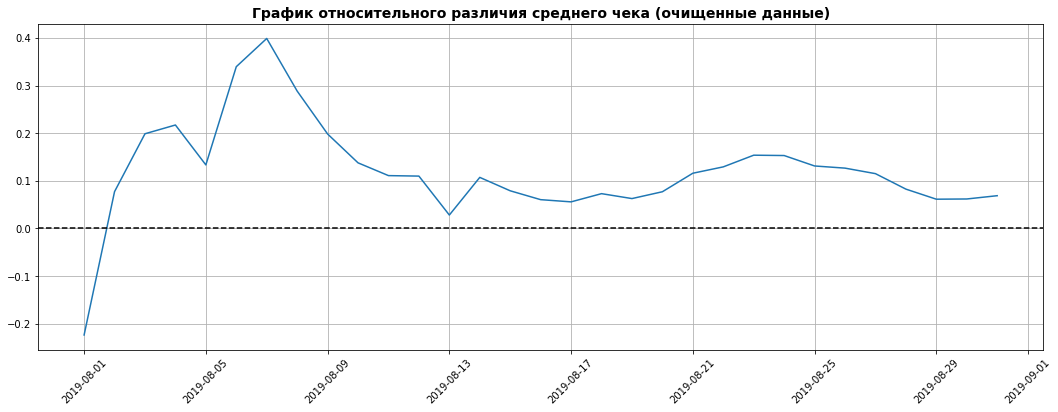

In [55]:
# Строим график, используя функцию

lineplot(18, 6,
        'date', 'arrpu_cumulative_b_to_a', orders_merged_cumulative_filtered,
        'График относительного различия среднего чека (очищенные данные)', 
         0)

То же самое подтверждает график относительного различия кумулятивного среднего чека.

<a id='section_2.7'></a>
### 2.7 Выводы и рекомендации по результатам анализа

По результатам анализа полученных данных можно сделать следующие выводы и рекомендации:

1. Данные выглядят стабильными и достаточными, то есть тест можно остановить.
2. Анализ данных выявил статистически значимые различия в конверсии групп, что в сырых данных, что в очищенных - конверсия группы В увеличилась по отношению к группе А на 13.8% в сырых данных / 16.6% в очищенных данных. Однако, нашей целью было увеличение среднего чека.
3. В свою очередь анализ данных среднего чека не выявил статистически значимого отличия между группами А и В, несмотря на то, что зафиксировано увеличение среднего чека на 25.9% в сырых данных / 6.9% в очищенных данных. Таким образом, необходимо зафиксировать отсутствие различия между группами. 